In [1]:
import tensorflow_datasets as tfds
x_train, y_train = tfds.as_numpy(tfds.load('citrus_leaves', split='train', 
  batch_size=-1, as_supervised=True,))
label_names = ['Black Spot', 'Cranker', 'Greening', 'Healthy']

2022-11-02 09:18:41.184402: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(x_train.shape, y_train.shape)

(594, 256, 256, 3) (594,)


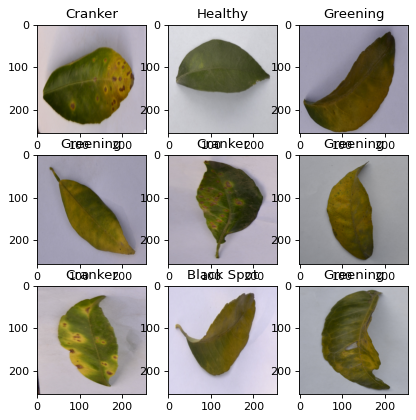

In [3]:
from matplotlib.pyplot import *
figure(figsize=(6,6), dpi=80)
for i in range(9):
  subplot(3,3,i+1)
  imshow(x_train[i])
  title(label_names[y_train[i]])

In [4]:
from tensorflow.keras.utils import to_categorical
x_train = x_train.astype("float32") / 255
num_classes = 4
y_train2 = to_categorical(y_train, num_classes)

In [5]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Resizing
model = Sequential()
model.add(Input(shape=(256, 256, 3)))
# model.add(Resizing(100,100))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 196608)            0         
                                                                 
 dense (Dense)               (None, 100)               19660900  
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 4)                 404       
                                                                 
Total params: 19,681,504
Trainable params: 19,681,504
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["acc"])
h = model.fit(x_train, y_train2, epochs=100, validation_split=0.2, batch_size=1)

Epoch 1/100
475/475 [==============================] - 32s 66ms/step - loss: 7.7321 - acc: 0.2926 - val_loss: 1.3517 - val_acc: 0.2689
Epoch 2/100
361/475 [=====================>........] - ETA: 7s - loss: 1.3335 - acc: 0.2881

KeyboardInterrupt: 

In [ ]:
subplot(121);title('Loss')
plot(h.epoch,h.history['loss'],h.epoch,h.history['val_loss'])
legend(['loss','val_loss'])
subplot(122);title('Accuracy')
plot(h.epoch,h.history['acc'],h.epoch,h.history['val_acc'])
legend(['acc','val_acc'])

In [ ]:
import time
t1 = time.time()
h = model.fit(x_train, y_train2, epochs=100, validation_split=0.2, batch_size=1)
t2 = time.time()
print(f"runtime = {t2-t1} s")

In [ ]:
subplot(121);title('Loss')
plot(h.epoch,h.history['loss'],h.epoch,h.history['val_loss'])
legend(['loss','val_loss'])
subplot(122);title('Accuracy')
plot(h.epoch,h.history['acc'],h.epoch,h.history['val_acc'])
legend(['acc','val_acc'])

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Resizing
model = Sequential()
model.add(Input(shape=(256, 256, 3)))
# model.add(Resizing(100,100))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 196608)            0         
                                                                 
 dense_4 (Dense)             (None, 256)               50331904  
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 50,530,308
Trainable params: 50,530,308


In [8]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["acc"])
t1 = time.time()
h = model.fit(x_train, y_train2, epochs=100, validation_split=0.2, batch_size=32)
t2 = time.time()
print(f"runtime = {t2-t1} s")

Epoch 1/100
15/15 [==============================] - 4s 221ms/step - loss: 31.0000 - acc: 0.2821 - val_loss: 18.8953 - val_acc: 0.0840
Epoch 2/100
15/15 [==============================] - 4s 261ms/step - loss: 22.4796 - acc: 0.2695 - val_loss: 7.5031 - val_acc: 0.2773
Epoch 3/100
15/15 [==============================] - 3s 213ms/step - loss: 9.0528 - acc: 0.2926 - val_loss: 4.1860 - val_acc: 0.2773
Epoch 4/100
15/15 [==============================] - 3s 210ms/step - loss: 2.5036 - acc: 0.3600 - val_loss: 3.1014 - val_acc: 0.5210
Epoch 5/100
15/15 [==============================] - 3s 216ms/step - loss: 2.2102 - acc: 0.3916 - val_loss: 1.3398 - val_acc: 0.5126
Epoch 6/100
15/15 [==============================] - 4s 255ms/step - loss: 1.4706 - acc: 0.4211 - val_loss: 1.5708 - val_acc: 0.3445
Epoch 7/100
15/15 [==============================] - 3s 233ms/step - loss: 1.3843 - acc: 0.4442 - val_loss: 1.1834 - val_acc: 0.5042
Epoch 8/100
15/15 [==============================] - 4s 258ms/step

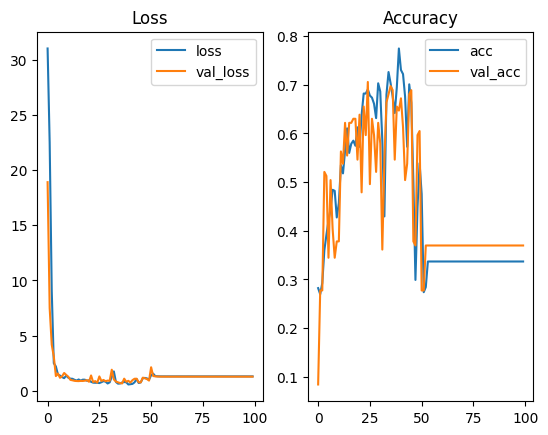

In [9]:
subplot(121);title('Loss')
plot(h.epoch,h.history['loss'],h.epoch,h.history['val_loss'])
legend(['loss','val_loss'])
subplot(122);title('Accuracy')
plot(h.epoch,h.history['acc'],h.epoch,h.history['val_acc'])
legend(['acc','val_acc'])

In [10]:
# CNN model
from tensorflow.keras.layers import Dropout, Conv2D, MaxPooling2D, Flatten
# d = 0.1
model = Sequential()
model.add(Input(shape=(256,256,3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(d))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(d))
model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(d))
model.add(Flatten())
model.add(Dense(4, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)      

In [11]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["acc"])
t1 = time.time()
h = model.fit(x_train, y_train2, epochs=100, validation_split=0.2, batch_size=32)
t2 = time.time()
print(f"runtime = {t2-t1} s")

Epoch 1/100
11/11 [==============================] - 15s 176ms/step - loss: 0.9944 - acc: 0.4618 - val_loss: 0.8223 - val_acc: 0.5765
Epoch 2/100
11/11 [==============================] - 1s 73ms/step - loss: 0.6862 - acc: 0.6853 - val_loss: 0.6028 - val_acc: 0.8118
Epoch 3/100
11/11 [==============================] - 1s 72ms/step - loss: 0.5989 - acc: 0.7324 - val_loss: 0.5351 - val_acc: 0.7882
Epoch 4/100
11/11 [==============================] - 1s 67ms/step - loss: 0.5250 - acc: 0.7618 - val_loss: 0.4743 - val_acc: 0.8118
Epoch 5/100
11/11 [==============================] - 1s 79ms/step - loss: 0.4478 - acc: 0.8118 - val_loss: 0.3717 - val_acc: 0.8706
Epoch 6/100
11/11 [==============================] - 1s 81ms/step - loss: 0.3151 - acc: 0.9059 - val_loss: 0.3312 - val_acc: 0.8588
Epoch 7/100
11/11 [==============================] - 1s 81ms/step - loss: 0.2485 - acc: 0.9147 - val_loss: 0.2246 - val_acc: 0.9294
Epoch 8/100
11/11 [==============================] - 1s 80ms/step - loss: 

11/11 [==============================] - 1s 84ms/step - loss: 3.7708e-04 - acc: 1.0000 - val_loss: 0.1024 - val_acc: 0.9647
Epoch 63/100
11/11 [==============================] - 1s 81ms/step - loss: 3.4968e-04 - acc: 1.0000 - val_loss: 0.1060 - val_acc: 0.9647
Epoch 64/100
11/11 [==============================] - 1s 84ms/step - loss: 3.3137e-04 - acc: 1.0000 - val_loss: 0.1007 - val_acc: 0.9647
Epoch 65/100
11/11 [==============================] - 1s 87ms/step - loss: 3.2761e-04 - acc: 1.0000 - val_loss: 0.1029 - val_acc: 0.9647
Epoch 66/100
11/11 [==============================] - 1s 88ms/step - loss: 2.8933e-04 - acc: 1.0000 - val_loss: 0.0969 - val_acc: 0.9647
Epoch 67/100
11/11 [==============================] - 1s 87ms/step - loss: 2.6876e-04 - acc: 1.0000 - val_loss: 0.0987 - val_acc: 0.9647
Epoch 68/100
11/11 [==============================] - 1s 83ms/step - loss: 2.6191e-04 - acc: 1.0000 - val_loss: 0.0980 - val_acc: 0.9647
Epoch 69/100
11/11 [==============================] - 

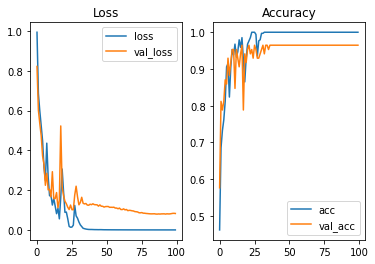

In [12]:
subplot(121);title('Loss')
plot(h.epoch,h.history['loss'],h.epoch,h.history['val_loss'])
legend(['loss','val_loss'])
subplot(122);title('Accuracy')
plot(h.epoch,h.history['acc'],h.epoch,h.history['val_acc'])
legend(['acc','val_acc'])